# Figure 2

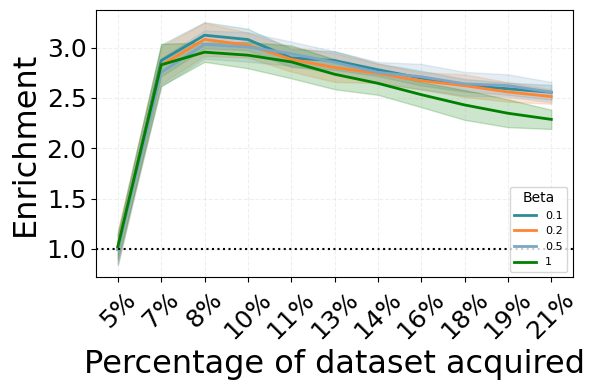

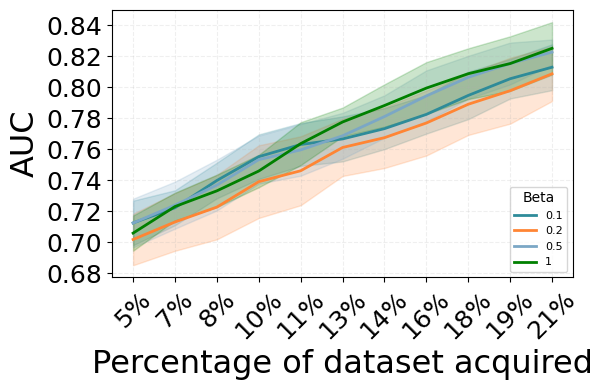

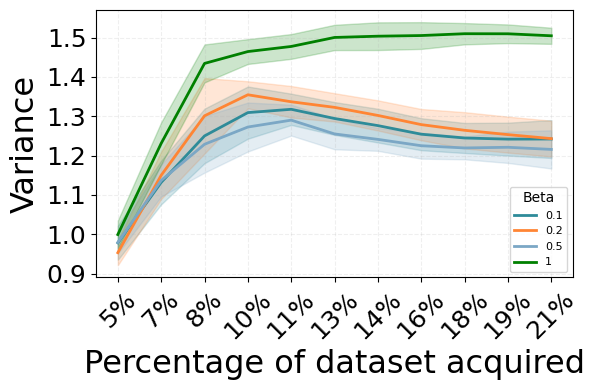

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys

sys.path.append("../src")

from utils import *
from hist_al import *





betas=['01','02', '05', '1']
betas_labels=['0.1','0.2', '0.5', '1']

strategy = 'UCB'
metrics = ['p', 'r', 'var']
metrics_name_dic = {'p': 'Enrichment', 'r': 'AUC', 'var': 'Variance'}
NB_POINTS = 50
NB_ROUNDS = 10
NB_0 = 173

points_list = np.array([NB_0 + i * NB_POINTS for i in range(NB_ROUNDS + 1)]) / 3274




colors = {
    '01': '#2E8B99',  # darker teal/turquoise
    '02': '#FF8534',     # darker orange/peach
    '05': '#7BA7C5',   # darker light blue
    '1': 'green'   # darker light blue

}
for metric in metrics:
    plt.figure(figsize=(6, 4))
    # plt.title(f'{metrics_name_dic[metric]} for Different Strategies, Bloom', fontsize=16)
    plt.xlabel('Percentage of dataset acquired', fontsize=23)  # Updated label
    plt.ylabel(metrics_name_dic[metric], fontsize=23)
    plt.grid(True, linestyle='--', alpha=0.2)
    
    # Convert points_list to percentages and round to integers
    percentage_points_list = np.round(points_list * 100).astype(int)
    
    # Set xticks as percentages
    plt.xticks(points_list[:len(percentage_points_list)],  # Use original points_list for positioning
               [f"{x}%" for x in percentage_points_list],  # Format as percentages
               fontsize=18, rotation=45)
    plt.yticks(fontsize=18)
    
    # Create empty lists to store plot handles and labels for legend
    handles = []
    labels = []
    
    # First plot UCB and greedy lines
    for beta in betas:
        data_dir='../script_results/ucb_tuning/'+beta+'/hist_al_bloom_esm3_coord'
        mean_file = f'{strategy}_mean_{metric}.npy'
        std_file = f'{strategy}_std_{metric}.npy'
        mean_path = os.path.join(data_dir, mean_file)
        std_path = os.path.join(data_dir, std_file)
        
        if os.path.exists(mean_path) and os.path.exists(std_path):
            mean_data = np.load(mean_path)
            std_data = np.load(std_path)
            
            if metric == "p":
                mean_data = mean_data / points_list
                std_data = std_data / points_list
            
            line = plt.plot(points_list[:len(mean_data)],  # Use points_list for x-axis
                            mean_data,
                            label=f'{strategy}',
                            color=colors[beta],
                            linewidth=2)[0]
            plt.fill_between(
                points_list[:len(mean_data)],  # Use points_list for x-axis
                mean_data - std_data,
                mean_data + std_data,
                color=colors[beta],
                alpha=0.2
            )
            handles.append(line)
            labels.append(beta)
        else:
            print(f"Warning: Missing files for {strategy} - {metric}")
    
    # Then add horizontal lines
    if metric == "p":
        random_line = plt.axhline(y=1, color='black', linestyle=':', linewidth=1.5, label='Random Baseline')


    plt.legend(handles, betas_labels, fontsize=8, title_fontsize='10', loc='lower right', title='Beta')
    plt.tight_layout()
    # plt.savefig(f'../figures/{metrics_name_dic[metric]}_bloom.eps', dpi=1200, bbox_inches='tight')
    plt.savefig(f'../figures/{metrics_name_dic[metric]}_bloom_beta.png', dpi=1200, bbox_inches='tight')
    plt.show()



points_list [0.00061035 0.00091553 0.0012207  0.00152588 0.00183105 0.00213623
 0.00244141 0.00274658 0.00305176 0.00335693 0.00366211]


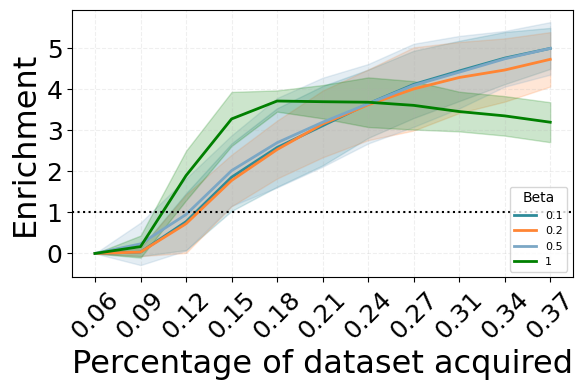

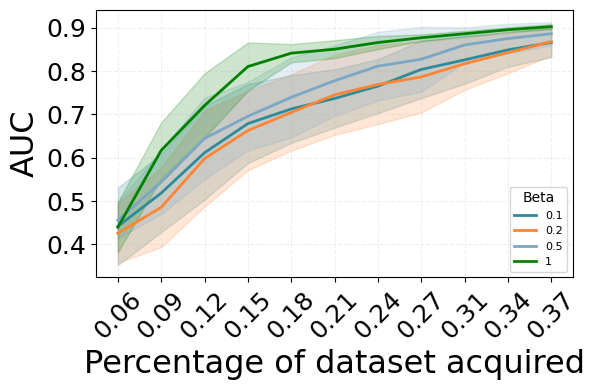

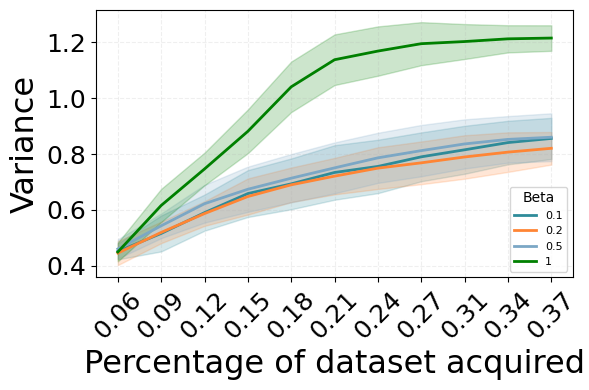

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sys

sys.path.append("../src")

from utils import *
from hist_al import *





betas=['01','02', '05', '1']
betas_labels=['0.1','0.2', '0.5', '1']

strategy = 'UCB'
metrics = ['p', 'r', 'var']
metrics_name_dic = {'p': 'Enrichment', 'r': 'AUC', 'var': 'Variance'}

NB_POINTS = 10
NB_ROUNDS = 10  # 5
NB_RUNS = 10  # 3
NB_0 = 20
points_list = np.array([NB_0 + i * NB_POINTS for i in range(NB_ROUNDS + 1)]) / 32768
print('points_list',points_list )



colors = {
    '01': '#2E8B99',  # darker teal/turquoise
    '02': '#FF8534',     # darker orange/peach
    '05': '#7BA7C5',   # darker light blue
    '1': 'green'   # darker light blue

}
for metric in metrics:
    plt.figure(figsize=(6, 4))
    # plt.title(f'{metrics_name_dic[metric]} for Different Strategies, Bloom', fontsize=16)
    plt.xlabel('Percentage of dataset acquired', fontsize=23)  # Updated label
    plt.ylabel(metrics_name_dic[metric], fontsize=23)
    plt.grid(True, linestyle='--', alpha=0.2)
    
    # Convert points_list to percentages and round to integers
    percentage_points_list = np.round(points_list * 100, 2)

    
    # Set xticks as percentages
    plt.xticks(points_list[:len(percentage_points_list)],  # Use original points_list for positioning
               [f"{x:.2f}" for x in percentage_points_list],  # Format as percentages rounded to 0.01%
               fontsize=18, rotation=45)
    plt.yticks(fontsize=18)
    
    # Create empty lists to store plot handles and labels for legend
    handles = []
    labels = []
    
    # First plot UCB and greedy lines
    for beta in betas:
        data_dir='../script_results/ucb_tuning/'+beta+'/hist_al_desai_esm3_coord'
        mean_file = f'{strategy}_mean_{metric}.npy'
        std_file = f'{strategy}_std_{metric}.npy'
        mean_path = os.path.join(data_dir, mean_file)
        std_path = os.path.join(data_dir, std_file)
        
        if os.path.exists(mean_path) and os.path.exists(std_path):
            mean_data = np.load(mean_path)
            std_data = np.load(std_path)
            
            if metric == "p":
                mean_data = mean_data / points_list
                std_data = std_data / points_list
            
            line = plt.plot(points_list[:len(mean_data)],  # Use points_list for x-axis
                            mean_data,
                            label=f'{strategy}',
                            color=colors[beta],
                            linewidth=2)[0]
            plt.fill_between(
                points_list[:len(mean_data)],  # Use points_list for x-axis
                mean_data - std_data,
                mean_data + std_data,
                color=colors[beta],
                alpha=0.2
            )
            handles.append(line)
            labels.append(beta)
        else:
            print(f"Warning: Missing files for {strategy} - {metric}")
    
    # Then add horizontal lines
    if metric == "p":
        random_line = plt.axhline(y=1, color='black', linestyle=':', linewidth=1.5, label='Random Baseline')


    plt.legend(handles, betas_labels, fontsize=8, title_fontsize='10', loc='lower right', title='Beta')
    plt.tight_layout()
    # plt.savefig(f'../figures/{metrics_name_dic[metric]}_bloom.eps', dpi=1200, bbox_inches='tight')
    plt.savefig(f'../figures/{metrics_name_dic[metric]}_desai_beta.png', dpi=1200, bbox_inches='tight')
    plt.show()

